# Indicator analysis
Purpose: Find indicator that can be used on get t events

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.momentum import *
from ta.trend import *
from ta.volume import *
from ta.volatility import *

import sys
sys.path.insert(0, '..')
import useful_functions as uf

In [2]:
df = pd.read_csv("../data/BTCUSDT-volume-bars.csv", index_col=0, parse_dates=True)

In [5]:
def variations(windows:list[int]):
    """
    returns variations of rsi indicator with given windows
    """
    name = "rsi_"
    for w in windows:

        i = RSIIndicator(df.close, w)
        df[name + str(w)] = i.rsi()
        df[name + "rate_" + str(w)] = uf.get_rate(uf.get_moving_average(df[name + str(w)], w))
variations([1000, 10_000])

In [6]:
df

,open,high,low,close,volume,rsi_1000,rsi_rate_1000,rsi_10000,rsi_rate_10000
time,,,,,,,,,
2017-08-17 04:21:13.356,4261.48,4280.56,4261.48,4266.29,5.002297,NaN,NaN,NaN,NaN
2017-08-17 04:29:19.766,4266.29,4270.41,4261.32,4267.47,5.356629,NaN,NaN,NaN,NaN
2017-08-17 04:33:00.057,4261.45,4280.56,4261.45,4267.99,7.935627,NaN,NaN,NaN,NaN
2017-08-17 04:39:32.027,4296.63,4300.38,4296.63,4300.38,5.027790,NaN,NaN,NaN,NaN
2017-08-17 04:43:05.191,4300.38,4300.38,4300.38,4300.38,5.109679,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-06-19 16:27:04.502,35831.71,35844.86,35831.71,35841.54,5.539350,49.234626,-0.002399,49.799023,0.000068
2021-06-19 16:27:20.667,35841.57,35841.58,35822.03,35823.32,5.033671,49.146418,-0.002546,49.789332,0.000066
2021-06-19 16:27:26.627,35823.32,35833.69,35823.32,35826.83,5.425236,49.163981,-0.002521,49.791214,0.000066


In [21]:
i = df.rsi_1000
print(f"max: {max(i[1:].dropna())}")
print(f"min: {min(i[1:].dropna())}")
print(f"mean: {np.mean(i)}")
print(f"median: {np.median(i[1:].dropna())}")

max: 61.53912767284422
min: 41.42491676947099
mean: 50.09202206286789
median: 50.09494570599098


In [25]:
new = df.rsi_1000.map(lambda x: (x-40.)/500. if x != None else None)

In [26]:
new.to_csv("../data/indicator.csv")

In [27]:
new

time
2017-08-17 04:21:13.356         NaN
2017-08-17 04:29:19.766         NaN
2017-08-17 04:33:00.057         NaN
2017-08-17 04:39:32.027         NaN
2017-08-17 04:43:05.191         NaN
                             ...   
2021-06-19 16:27:04.502    0.018469
2021-06-19 16:27:20.667    0.018293
2021-06-19 16:27:26.627    0.018328
2021-06-19 16:27:44.405    0.018539
2021-06-19 16:27:48.270    0.018461
Name: rsi_1000, Length: 11798850, dtype: float64

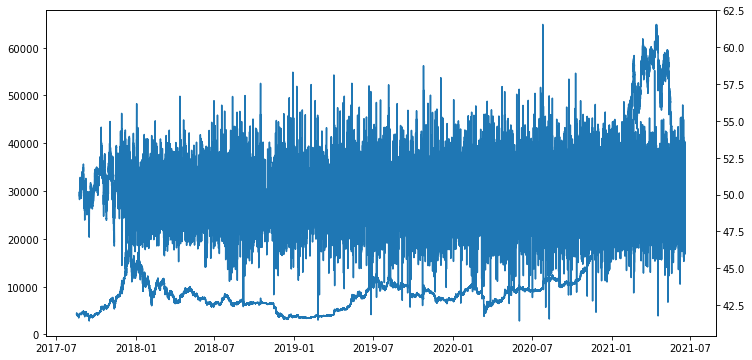

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.close)
ax1 = ax.twinx()
ax1.plot(df.rsi_1000)